<a href="https://colab.research.google.com/github/jayantsharma12/Customer-Lifetime-Value-Prediction-code/blob/main/test_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Marketing: Customer Clustering and RFM Analysis
# Objective: Cluster customers into 3-4 segments based on Recency, Frequency, and Monetary (RFM) values and derive marketing strategies.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data=pd.read_excel(input())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/Copy of customer_transactions_sample.xlsx


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]
data = data[~data['Invoice'].str.startswith('C', na=False)]
data.dropna(subset=['Customer ID'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['TotalSum'] = data['Quantity'] * data['Price']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set snapshot date
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate RFM values
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalSum': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Elbow Method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

In [ ]:
print(k)

10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


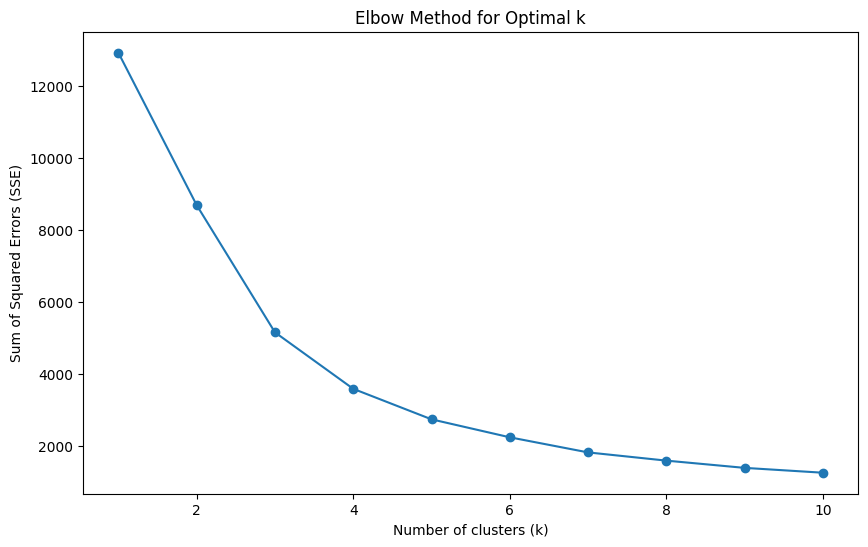

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
# Optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score: 0.6107388872222405


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


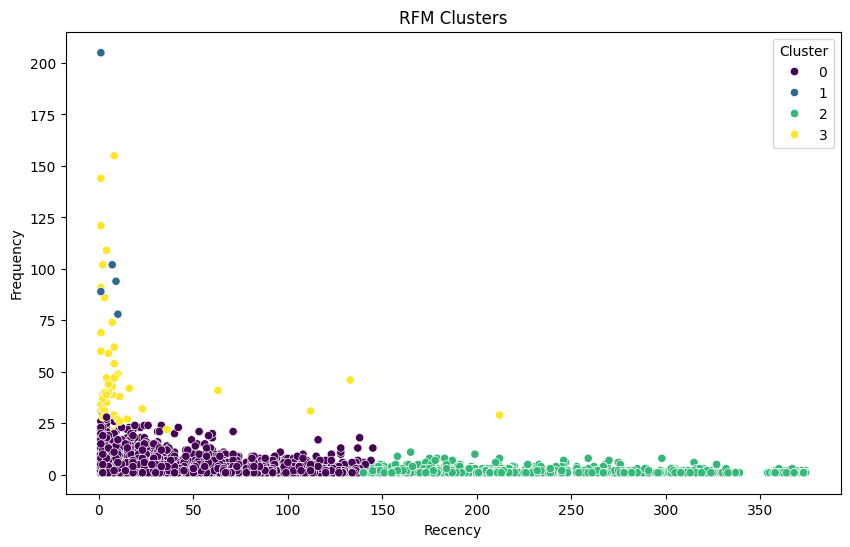

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis')
plt.title('RFM Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


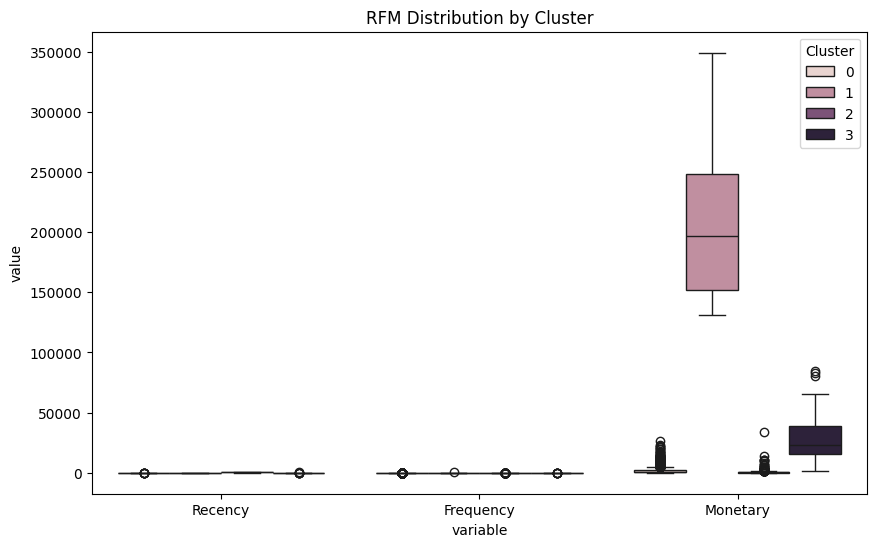

In [ ]:
# Visualize RFM distribution
rfm_melted = rfm.melt(id_vars=['CustomerID', 'Cluster'], value_vars=['Recency', 'Frequency', 'Monetary'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', hue='Cluster', data=rfm_melted)
plt.title('RFM Distribution by Cluster')
plt.show()

# 2. Operations: Sales Forecasting
# Objective: Forecast daily sales at the country level for the next 2 months.

In [ ]:
!pip install prophet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the data from the uploaded Excel file
try:
    data = pd.read_excel(file_name)
except Exception as e:
    print(f"Error loading file: {e}")
    data.head()
if 'InvoiceDate' not in data.columns:
    print("Column 'InvoiceDate' not found in the dataset.")
else:
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

    data['TotalSales'] = data['Quantity'] * data['Price']
    daily_sales = data.groupby(['InvoiceDate', 'Country'])['TotalSales'].sum().reset_index()
    print(daily_sales.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Error loading file: name 'file_name' is not defined
          InvoiceDate         Country  TotalSales
0 2009-12-01 07:45:00  United Kingdom      505.30
1 2009-12-01 07:46:00  United Kingdom      145.80
2 2009-12-01 09:06:00  United Kingdom      630.33
3 2009-12-01 09:08:00  United Kingdom      310.75
4 2009-12-01 09:24:00  United Kingdom     2286.24


In [ ]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate daily sales
data['Sales'] = data['Quantity'] * data['Price']

# Aggregate daily sales by country
daily_sales = data.groupby(['InvoiceDate', 'Country'])['Sales'].sum().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
daily_sales.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceDate,Country,Sales
0,2009-12-01 07:45:00,United Kingdom,505.30
1,2009-12-01 07:46:00,United Kingdom,145.80
2,2009-12-01 09:06:00,United Kingdom,630.33
3,2009-12-01 09:08:00,United Kingdom,310.75
4,2009-12-01 09:24:00,United Kingdom,2286.24


In [ ]:
# Prepare the data for Prophet
daily_sales_prophet = daily_sales.rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})

# Optional: Filter for a specific country if needed
country = input("Please enter the country name: ")
daily_sales_prophet = daily_sales_prophet[daily_sales_prophet['Country'] == country]
daily_sales_prophet = daily_sales_prophet[['ds', 'y']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Please enter the country name: France


In [ ]:
# Prepare the data for Prophet
daily_sales_prophet = daily_sales.rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter for the specified country
daily_sales_prophet = daily_sales_prophet[daily_sales_prophet['Country'] == country]
daily_sales_prophet = daily_sales_prophet[['ds', 'y']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from prophet import Prophet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpql3uuvxk/lms1ahj9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpql3uuvxk/jyi415ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9907', 'data', 'file=/tmp/tmpql3uuvxk/lms1ahj9.json', 'init=/tmp/tmpql3uuvxk/jyi415ha.json', 'output', 'file=/tmp/tmpql3uuvxk/prophet_model9a6sq4wz/prophet_model-20240518154059.csv', 'method=optimize', 'algorithm=lbfg

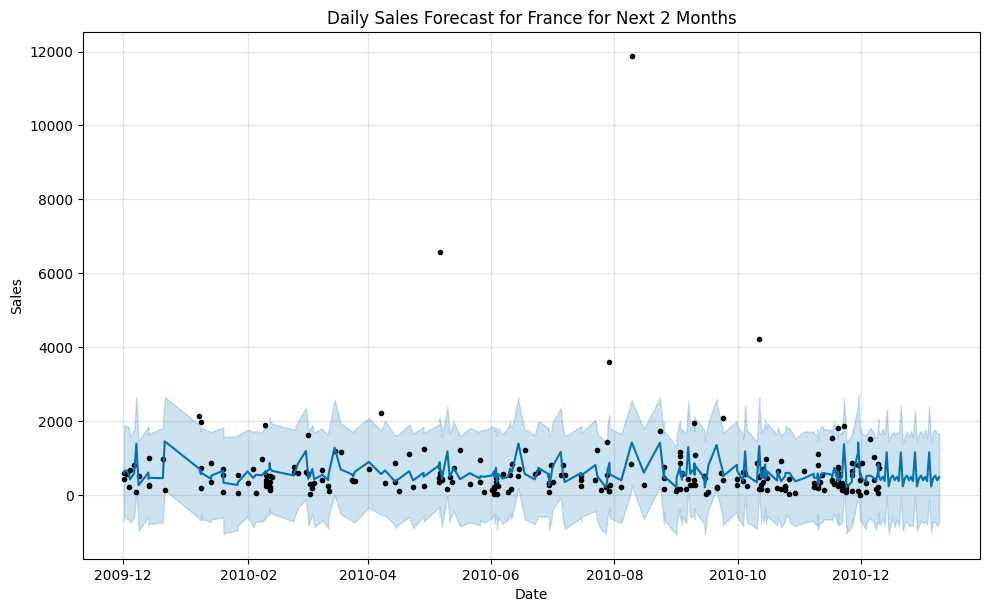

In [ ]:
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(daily_sales_prophet)

# Create a dataframe for future dates
future_dates = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title(f'Daily Sales Forecast for {country} for Next 2 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSum,TotalSales,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0,30.0


In [ ]:

# absolute errors
forecast['abs_error'] = abs(forecast['yhat'] - daily_sales['Sales'])

# MAE (Mean Absolute Error)
mae = forecast['abs_error'].mean()

# MSE (Mean Squared Error)
mse = (forecast['abs_error'] ** 2).mean()

# RMSE (Root Mean Squared Error)
rmse = mse ** 0.5

# MAPE (Mean Absolute Percentage Error)
forecast['ape'] = forecast['abs_error'] / daily_sales['Sales']
mape = forecast['ape'].mean() *100

# Display the accuracy metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 509.4211514928571
MSE: 1272944.1094609606
RMSE: 1128.2482481532868
MAPE: 515.1427189962344%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


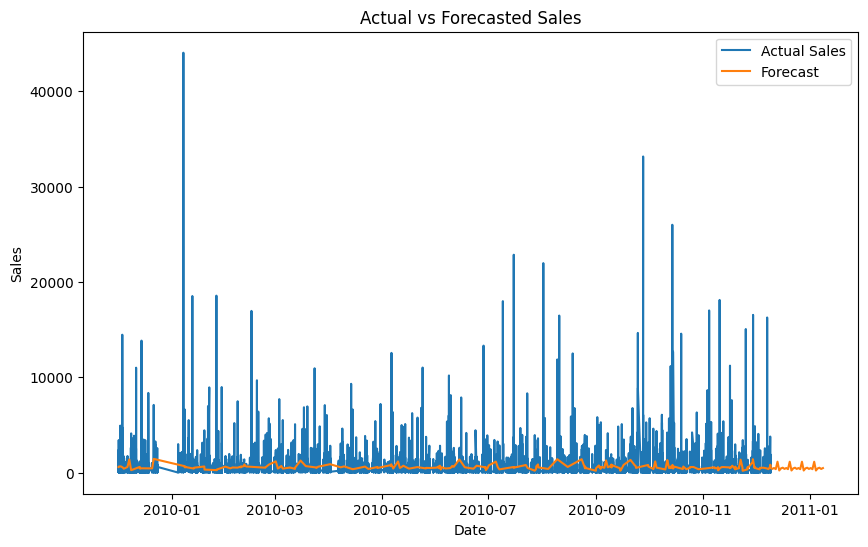

In [ ]:
# Plot the forecast and actual sales data
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Sales'], label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 3. Retail Products: Cross-Sell and Up-Sell Recommendations
Objective: Suggest the next best product in line for the top 10 selling stock codes to promote cross-sell and up-sell.

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if 'Invoice' in data.columns and 'StockCode' in data.columns and 'Quantity' in data.columns:
    top_products = data.groupby('StockCode')['Quantity'].sum().nlargest(10).index

    top_products_data = data[data['StockCode'].isin(top_products)]

    basket = top_products_data.groupby(['Invoice', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')
    basket = basket.applymap(lambda x: 1 if x > 0 else 0)

    basket.head()
else:
    print("Required columns ('InvoiceNo', 'StockCode', 'Quantity') are missing.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
abi_matrix = basket.T.dot(basket)

abi_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


StockCode,17003,21212,21977,22197,37410,84077,84879,84991,85099B,85123A
StockCode,,,,,,,,,,
17003,188,26,13,8,0,17,9,17,17,31
21212,26,1522,528,142,1,76,158,601,278,301
21977,13,528,928,91,0,41,108,468,136,175
22197,8,142,91,759,0,26,43,107,113,137
37410,0,1,0,0,18,1,2,1,2,1


1. In simple terms, they are the "if" part of the rule. For example, in the rule "if customers buy bread, they also buy butter," bread is the antecedent.
2. They are the "then" part of the rule. Using the same example, butter is the consequent in the rule "if customers buy bread, they also buy butter."
3. **Product** A and Product B: These terms are used when calculating the Average Basket Item (ABI) index or creating a co-occurrence matrix. Product A and Product B represent pairs of products that are frequently bought together. For instance, if milk and cookies are often bought together, one could be Product A and the other Product B in the co-occurrence matrix. **bold text**

In [ ]:

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]

rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(21977),(21212),0.125084,0.205149,0.071169,0.568966,2.773427,0.045508,1.844054,0.730853
3,(84991),(21212),0.153120,0.205149,0.081008,0.529049,2.578855,0.049596,1.687759,0.722926
4,(21977),(84991),0.125084,0.153120,0.063081,0.504310,3.293555,0.043928,1.708488,0.795936
6,"(21977, 21212)",(84991),0.071169,0.153120,0.039898,0.560606,3.661212,0.029000,1.927381,0.782560
7,"(21977, 84991)",(21212),0.063081,0.205149,0.039898,0.632479,3.083022,0.026957,2.162734,0.721133
12,"(21977, 85099B)",(21212),0.018331,0.205149,0.012670,0.691176,3.369145,0.008910,2.573803,0.716320
16,"(21977, 85123A)",(21212),0.023588,0.205149,0.013479,0.571429,2.785433,0.008640,1.854652,0.656474
21,"(85099B, 84991)",(21212),0.023858,0.205149,0.015366,0.644068,3.139513,0.010472,2.233153,0.698135
24,"(85123A, 21212)",(84991),0.040572,0.153120,0.021566,0.531561,3.471527,0.015354,1.807878,0.742048
25,"(85123A, 84991)",(21212),0.038280,0.205149,0.021566,0.563380,2.746201,0.013713,1.820465,0.661170


In [ ]:
# Sort rules by lift
rules = rules.sort_values('lift', ascending=False)

#top rules
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32,"(85123A, 21977)",(84991),0.023588,0.153120,0.013344,0.565714,3.694572,0.009732,1.950052,0.746952
6,"(21977, 21212)",(84991),0.071169,0.153120,0.039898,0.560606,3.661212,0.029000,1.927381,0.782560
24,"(85123A, 21212)",(84991),0.040572,0.153120,0.021566,0.531561,3.471527,0.015354,1.807878,0.742048
12,"(21977, 85099B)",(21212),0.018331,0.205149,0.012670,0.691176,3.369145,0.008910,2.573803,0.716320
4,(21977),(84991),0.125084,0.153120,0.063081,0.504310,3.293555,0.043928,1.708488,0.795936
21,"(85099B, 84991)",(21212),0.023858,0.205149,0.015366,0.644068,3.139513,0.010472,2.233153,0.698135
7,"(21977, 84991)",(21212),0.063081,0.205149,0.039898,0.632479,3.083022,0.026957,2.162734,0.721133
16,"(21977, 85123A)",(21212),0.023588,0.205149,0.013479,0.571429,2.785433,0.008640,1.854652,0.656474
0,(21977),(21212),0.125084,0.205149,0.071169,0.568966,2.773427,0.045508,1.844054,0.730853
25,"(85123A, 84991)",(21212),0.038280,0.205149,0.021566,0.563380,2.746201,0.013713,1.820465,0.661170


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


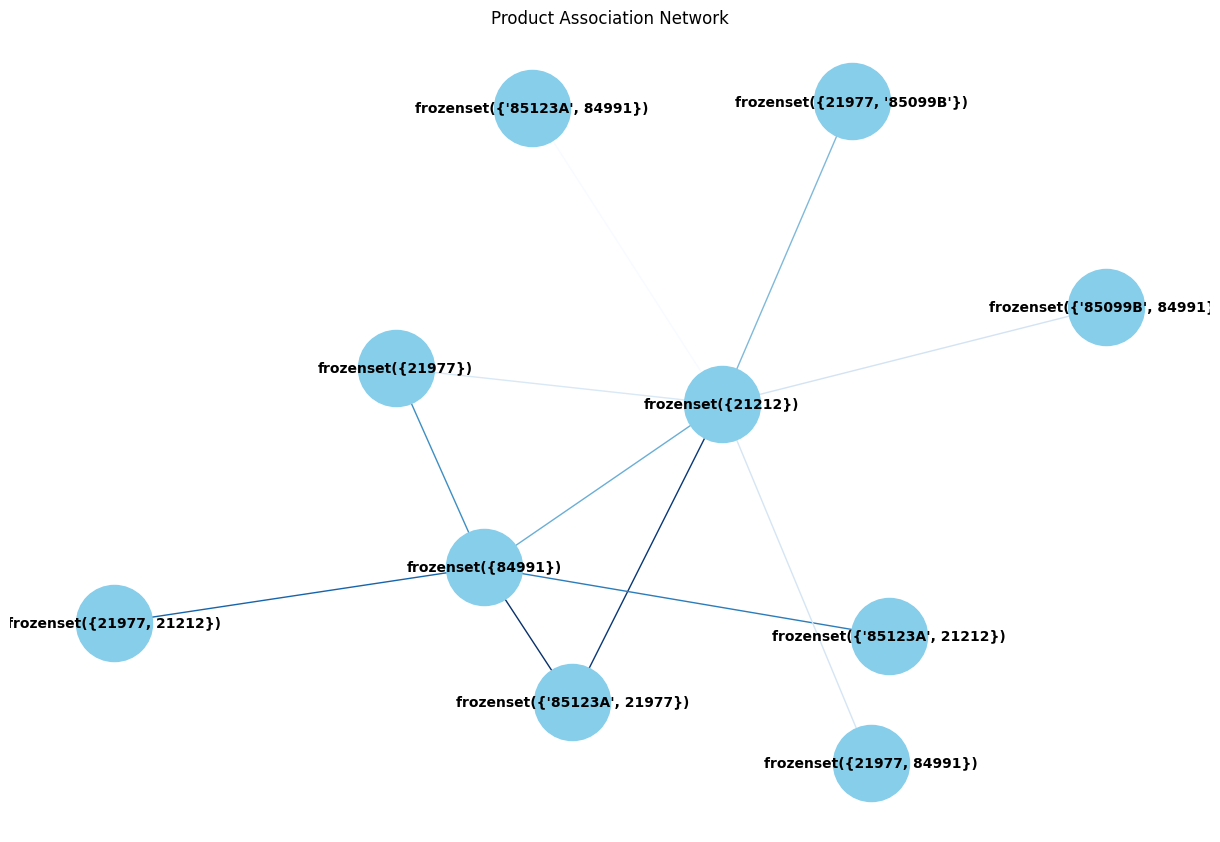

In [ ]:
#network graph
G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color=rules['lift'], edge_cmap=plt.cm.Blues)
plt.title('Product Association Network')
plt.show()

In [ ]:
# Strategy: Arrange store shelves to place high-ABI items together
abi_matrix = abi_matrix.rename_axis('Product_A').rename_axis('Product_B', axis=1)
high_abi_pairs = abi_matrix.stack().reset_index()
high_abi_pairs.columns = ['Product_A', 'Product_B', 'ABI_Index']
high_abi_pairs = high_abi_pairs[high_abi_pairs['Product_A'] != high_abi_pairs['Product_B']]
high_abi_pairs = high_abi_pairs.sort_values('ABI_Index', ascending=False).head(10)

high_abi_pairs

for index, row in rules.iterrows():
    print(f"Bundle: {list(row['antecedents'])} + {list(row['consequents'])} (Confidence: {row['confidence']}, Lift: {row['lift']})")


Bundle: ['85123A', 21977] + [84991] (Confidence: 0.5657142857142857, Lift: 3.6945724346076463)
Bundle: [21977, 21212] + [84991] (Confidence: 0.5606060606060607, Lift: 3.6612115877080673)
Bundle: ['85123A', 21212] + [84991] (Confidence: 0.53156146179402, Lift: 3.4715268354311926)
Bundle: [21977, '85099B'] + [21212] (Confidence: 0.6911764705882353, Lift: 3.3691447012444926)
Bundle: [21977] + [84991] (Confidence: 0.5043103448275862, Lift: 3.293554972073822)
Bundle: ['85099B', 84991] + [21212] (Confidence: 0.6440677966101696, Lift: 3.1395131294683627)
Bundle: [21977, 84991] + [21212] (Confidence: 0.6324786324786323, Lift: 3.0830216651504427)
Bundle: [21977, '85123A'] + [21212] (Confidence: 0.5714285714285714, Lift: 2.785432701332833)
Bundle: [21977] + [21212] (Confidence: 0.5689655172413792, Lift: 2.773426525896053)
Bundle: ['85123A', 84991] + [21212] (Confidence: 0.5633802816901409, Lift: 2.7462012548351873)
Bundle: [84991] + [21212] (Confidence: 0.5290492957746479, Lift: 2.57885461586866

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


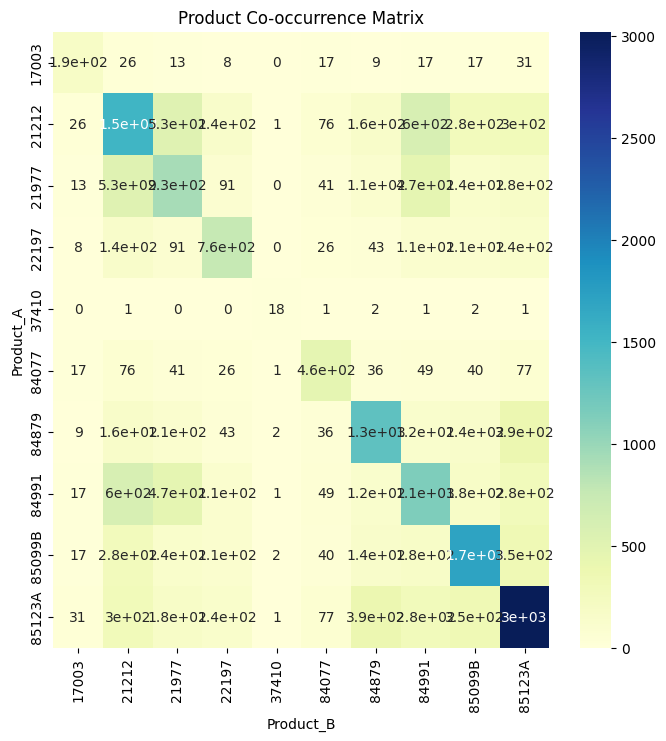

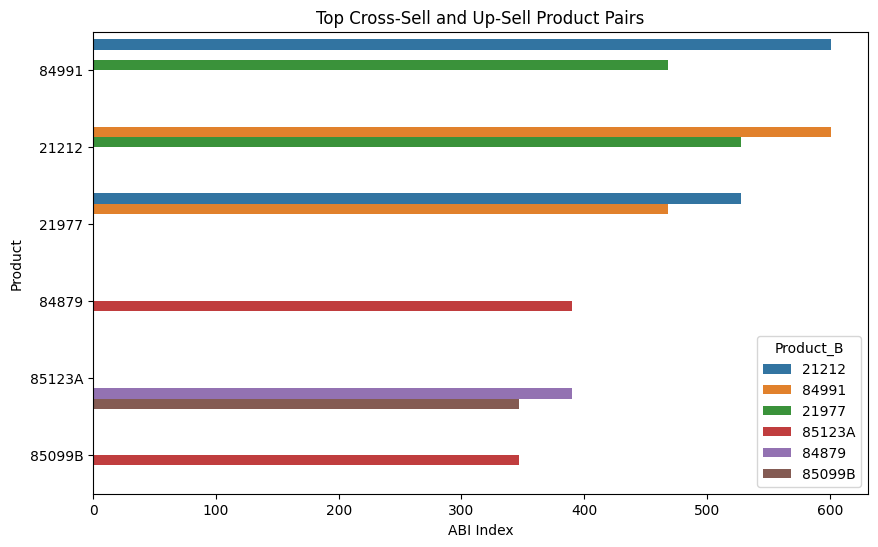

In [ ]:
# co-occurrence matrix
plt.figure(figsize=(8, 8))
plt.title('Product Co-occurrence Matrix')
sns.heatmap(abi_matrix, annot=True, cmap='YlGnBu')
plt.show()
# product pairs
plt.figure(figsize=(10, 6))
sns.barplot(x='ABI_Index', y='Product_A', hue='Product_B', data=high_abi_pairs)
plt.title('Top Cross-Sell and Up-Sell Product Pairs')
plt.xlabel('ABI Index')
plt.ylabel('Product')
plt.show()


# 1. Top Cross-Sell and Up-Sell Product Pairs
Top Cross-Sell Product Pairs: These are pairs of products that are frequently bought together. Identifying these pairs helps in placing them next to each other in stores to encourage customers to buy both items, thus increasing sales.
Top Up-Sell Product Pairs: These pairs usually consist of a base product and a complementary higher-end product. The goal is to persuade customers to purchase the more expensive item in addition to or instead of the base product.
# 2. ABI Index (Average Basket Index)
The ABI Index is a measure used to quantify how often two products are bought together. The higher the ABI Index, the more frequently the two products are purchased together. This helps in identifying strong associations between products and is useful for cross-selling and up-selling strategies.
# 3. Product A and Product B
Product A and Product B: These terms refer to the two items being analyzed for their co-occurrence. When calculating the ABI Index or identifying association rules, Product A and Product B are paired to determine how frequently they are bought together.

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSum,TotalSales,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0,30.0


# 4. Customer Relationship Management: Churn Prediction
Objective: Predict customer churn at the country and month level to optimize retention strategies.

In [ ]:
# Define churn: Customers who have not purchased in the last 6 months
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
latest_date = data['InvoiceDate'].max()
data['Churn'] = data.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (latest_date - x.max()).days > 180)

# Aggregate monthly customer data by country
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_data = data.groupby(['Customer ID', 'Country', 'Month']).agg({
    'Quantity': 'sum',
    'Price': 'mean',
    'Invoice': 'nunique',
    'Churn': 'max'
}).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate monthly spend
monthly_data['TotalSpend'] = monthly_data['Quantity'] * monthly_data['Price']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
monthly_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer ID,Country,Month,Quantity,Price,Invoice,Churn,TotalSpend
0,12346.0,United Kingdom,2009-12,26,3.800,5,False,98.800
1,12346.0,United Kingdom,2010-01,20,4.500,4,False,90.000
2,12346.0,United Kingdom,2010-03,5,5.410,1,False,27.050
3,12346.0,United Kingdom,2010-06,19,7.490,1,False,142.310
4,12347.0,Iceland,2010-10,509,1.834,1,False,933.506


In [ ]:
# Create additional features
#monthly_data['PurchaseFrequency'] = monthly_data.groupby('Customer ID')['InvoiceNo'].transform('count')
monthly_data['AverageSpend'] = monthly_data.groupby('Customer ID')['TotalSpend'].transform('mean')
monthly_data['Recency'] = monthly_data.groupby('Customer ID')['Month'].transform(lambda x: (latest_date - x.max().to_timestamp()).days)

# Encode categorical variables
monthly_data = pd.get_dummies(monthly_data, columns=['Country'], drop_first=True)

# Drop unnecessary columns
monthly_data = monthly_data.drop(['Quantity', 'Price', 'Month'], axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
monthly_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer ID,Invoice,Churn,TotalSpend,AverageSpend,Recency,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,12346.0,5,False,98.800,89.540,191,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,12346.0,4,False,90.000,89.540,191,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,12346.0,1,False,27.050,89.540,191,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,12346.0,1,False,142.310,89.540,191,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,12347.0,1,False,933.506,927.708,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Split data into training and validation sets
X = monthly_data.drop(['Customer ID', 'Churn'], axis=1)
y = monthly_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

ROC-AUC: 0.9968
Precision: 0.9652
Recall: 0.9212


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


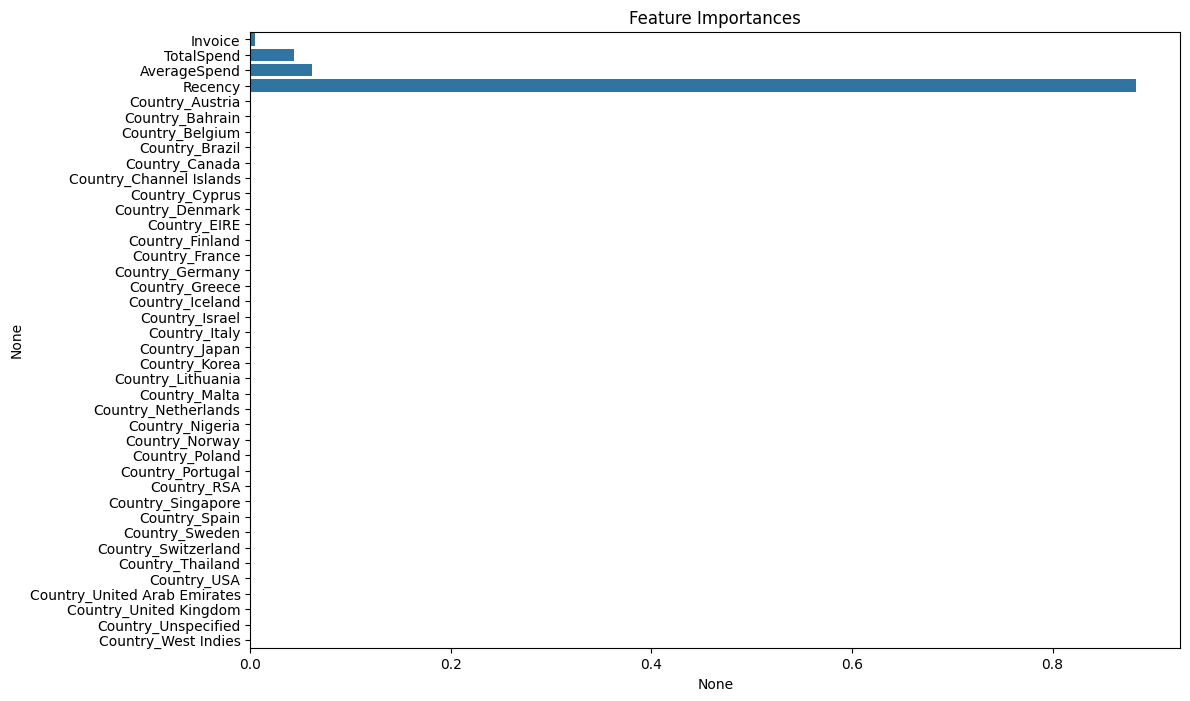

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.show()


In [ ]:
print(monthly_data.columns)

Index(['Customer ID', 'Invoice', 'Churn', 'TotalSpend', 'AverageSpend',
       'Recency', 'Country_Austria', 'Country_Bahrain', 'Country_Belgium',
       'Country_Brazil', 'Country_Canada', 'Country_Channel Islands',
       'Country_Cyprus', 'Country_Denmark', 'Country_EIRE', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_Greece',
       'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan',
       'Country_Korea', 'Country_Lithuania', 'Country_Malta',
       'Country_Netherlands', 'Country_Nigeria', 'Country_Norway',
       'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Singapore', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_Thailand', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified', 'Country_West Indies'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 'Churn': This column contains binary values (0 or 1) indicating whether a customer has churned (1) or not (0).
# 'Churn_Probability': This column contain the predicted probability of churn for each customer, typically output by a machine learning model. **bold text**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


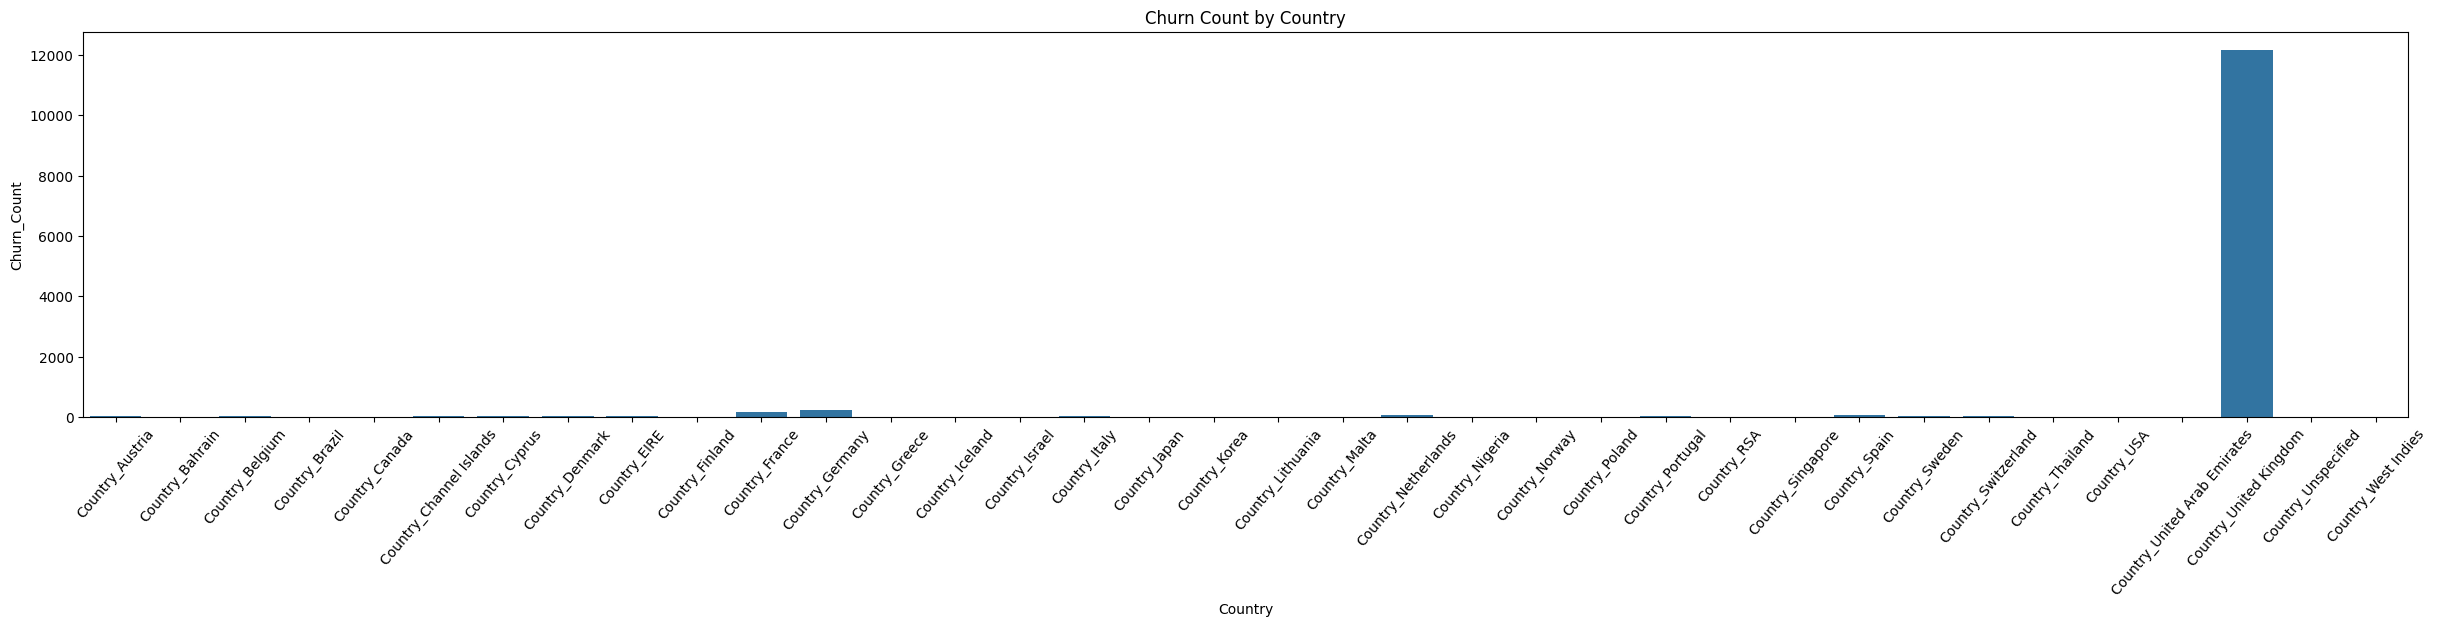

In [ ]:
# Sum up the churn values for each country
country_churn_counts = monthly_data.filter(like='Country').sum()

# DataFrame for country churn counts
country_churn_df = pd.DataFrame({'Country': country_churn_counts.index, 'Churn_Count': country_churn_counts.values})

plt.figure(figsize=(30, 5))
sns.barplot(x='Country', y='Churn_Count', data=country_churn_df)
plt.title('Churn Count by Country')
plt.xticks(rotation=50)
plt.show()

In [ ]:
ground_truth_churn = country_churn_counts
predicted_churn_counts = country_churn_df['Churn_Count']
total_predictions = predicted_churn_counts.sum()
correct_predictions = ground_truth_churn.sum()
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)

Accuracy: 100.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from joblib import dump
dump(model, 'test_ml.joblib')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['test_ml.joblib']